# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Fauzan Fachruzi Rauf
- **Email:** fauzan01rauf@gmail.com
- **ID Dicoding:** mfauzanfr01

## Menentukan Pertanyaan Bisnis

- Seberapa besar dampak musim terhadap tingkat penyewaan sepeda?

- Bagaimana perbedaan jumlah penyewa sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import zipfile
import os

## Data Wrangling

### Gathering Data

In [30]:
# Definisi ID file yang akan diunduh dari Google Drive
file_id = "16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d"
zip_file = "dataset.zip"
csv_file = "day.csv"

# Mengunduh file dari Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_file, quiet=False)

# Mengekstrak file jika yang diunduh adalah file ZIP
if zipfile.is_zipfile(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as archive:
        archive.extractall()  # Ekstrak semua isi ZIP ke direktori saat ini
        extracted_files = archive.namelist()
        print(f"File yang diekstrak: {extracted_files}")

        # Menentukan file CSV yang diekstrak
        csv_files = [f for f in extracted_files if f.endswith(".csv")]
        csv_file = csv_files[0] if csv_files else None
else:
    print("File yang diunduh bukan dalam format ZIP.")
    csv_file = zip_file  # Gunakan file unduhan langsung jika bukan ZIP

# Membaca file CSV jika tersedia
if csv_file and os.path.exists(csv_file):
    try:
        data_df = pd.read_csv(csv_file, encoding='utf-8', on_bad_lines='skip', engine='python')
    except UnicodeDecodeError:
        data_df = pd.read_csv(csv_file, encoding='ISO-8859-1', on_bad_lines='skip', engine='python')
    except pd.errors.ParserError:
        print("Kesalahan saat membaca file CSV. Pastikan format file benar.")
        data_df = None

    # Menampilkan lima baris pertama jika data berhasil dimuat
    if data_df is not None:
        display(data_df.head())
else:
    print("File CSV tidak ditemukan atau gagal dimuat.")

Downloading...
From: https://drive.google.com/uc?id=16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d
To: /content/dataset.zip
100%|██████████| 280k/280k [00:00<00:00, 76.6MB/s]

File yang diekstrak: ['Readme.txt', 'day.csv', 'hour.csv']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Musim memiliki dampak signifikan terhadap jumlah penyewaan sepeda.
- Pola penyewaan sepeda berbeda antara hari kerja dan akhir pekan.

### Assessing Data

In [31]:
# Memeriksa apakah dataset telah berhasil dimuat
if 'day_df' in locals() and day_df is not None:
    # Menampilkan ringkasan informasi dataset
    print("Detail Dataset:")
    print(day_df.info())

    # Mengecek apakah terdapat nilai yang hilang dalam dataset
    print("\nPemeriksaan Missing Values:")
    print(day_df.isna().sum())

    # Memeriksa apakah ada data yang duplikat
    print("\nPemeriksaan Duplikasi Data:")
    print(f"Total duplikasi ditemukan: {day_df.duplicated().sum()}")

    # Menampilkan ringkasan statistik dari dataset
    print("\nRingkasan Statistik:")
    print(day_df.describe())
else:
    print("Dataset belum dimuat. Pastikan file telah dibaca dengan benar.")


Detail Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Pemeriksaan Missing Values:
instant       0
dteday        0
season     

**Insight:**
- Dataset tidak memiliki banyak nilai yang hilang atau duplikasi, sehingga siap untuk dianalisis lebih lanjut.
- Statistik deskriptif menunjukkan distribusi data, termasuk rata-rata, nilai minimum, dan maksimum.

### Cleaning Data

In [32]:
# Proses Pembersihan Data
if day_df is not None:
    # Menghapus data yang terduplikasi
    day_df = day_df.drop_duplicates()

    # Menghapus entri yang memiliki nilai kosong
    day_df = day_df.dropna()

    # Menampilkan informasi dataset setelah dibersihkan
    print("Informasi Dataset Setelah Pembersihan:")
    print(day_df.info())

Informasi Dataset Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


**Insight:**
- Dataset telah dibersihkan dengan menghapus duplikasi dan nilai yang hilang, sehingga siap digunakan untuk analisis lebih lanjut.
- Pembersihan ini memastikan bahwa data yang digunakan lebih akurat dan tidak mengandung informasi ganda yang bisa menyebabkan bias dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Penyewaan Sepeda:
 count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


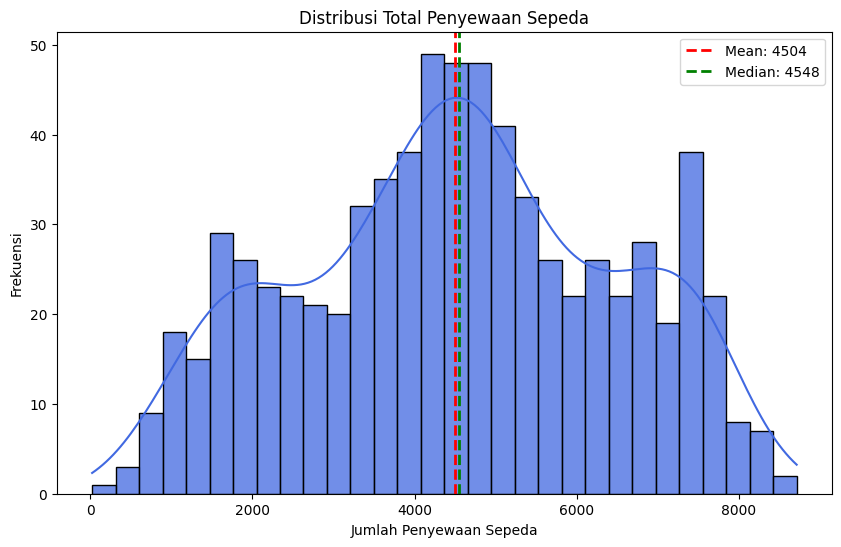

<ipython-input-33-2d02bbe62760>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=seasonal_avg, palette="coolwarm")


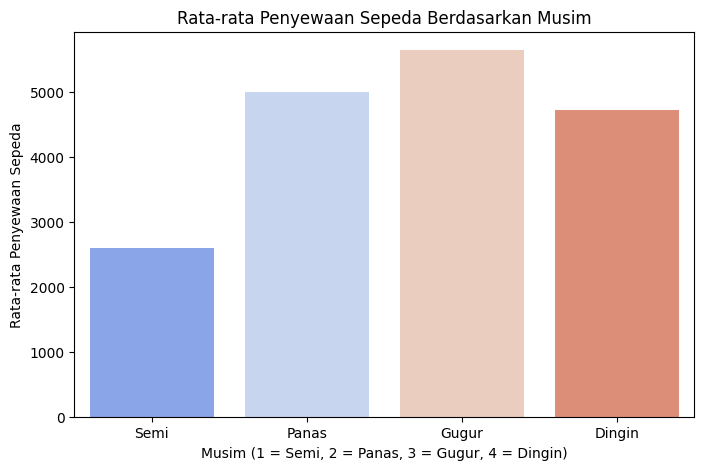

Rata-rata jumlah penyewaan sepeda per musim:
    season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


In [33]:
# Menghitung statistik deskriptif untuk jumlah penyewaan sepeda
rental_stats = day_df["cnt"].describe()
print("Statistik Penyewaan Sepeda:\n", rental_stats)

# Visualisasi distribusi jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.75)
plt.axvline(rental_stats["mean"], color="red", linestyle="dashed", linewidth=2, label=f"Mean: {rental_stats['mean']:.0f}")
plt.axvline(rental_stats["50%"], color="green", linestyle="dashed", linewidth=2, label=f"Median: {rental_stats['50%']:.0f}")
plt.title("Distribusi Total Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# Mengelompokkan data berdasarkan musim untuk menghitung rata-rata penyewaan sepeda
seasonal_avg = day_df.groupby("season")["cnt"].mean().reset_index()

# Membuat visualisasi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=seasonal_avg, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1 = Semi, 2 = Panas, 3 = Gugur, 4 = Dingin)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Semi", "Panas", "Gugur", "Dingin"])
plt.show()

# Menampilkan hasil perhitungan rata-rata penyewaan berdasarkan musim
print("Rata-rata jumlah penyewaan sepeda per musim:\n", seasonal_avg)


**Insight:**
-  Distribusi jumlah penyewaan sepeda menunjukkan pola yang tidak merata, dengan beberapa nilai ekstrem.
- Musim berperan penting dalam jumlah penyewaan sepeda, dengan musim tertentu menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-34-bd3fa0ff19ef>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=seasonal_total, palette="magma")


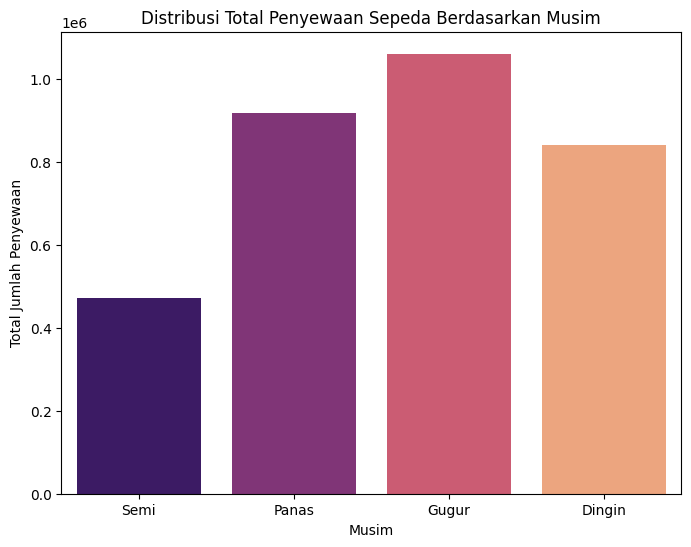

Total penyewaan sepeda per musim:
    season      cnt
0    Semi   471348
1   Panas   918589
2   Gugur  1061129
3  Dingin   841613


In [34]:
# Menghitung total penyewaan sepeda untuk setiap musim
seasonal_total = day_df.groupby("season")["cnt"].sum().reset_index()

# Mengonversi kode musim ke dalam label yang lebih deskriptif
season_names = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
seasonal_total["season"] = seasonal_total["season"].map(season_names)

# Membuat visualisasi total penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.barplot(x="season", y="cnt", data=seasonal_total, palette="magma")
plt.xlabel("Musim")
plt.ylabel("Total Jumlah Penyewaan")
plt.title("Distribusi Total Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(rotation=0)
plt.show()

# Menampilkan hasil perhitungan total penyewaan berdasarkan musim
print("Total penyewaan sepeda per musim:\n", seasonal_total)


### Pertanyaan 2:

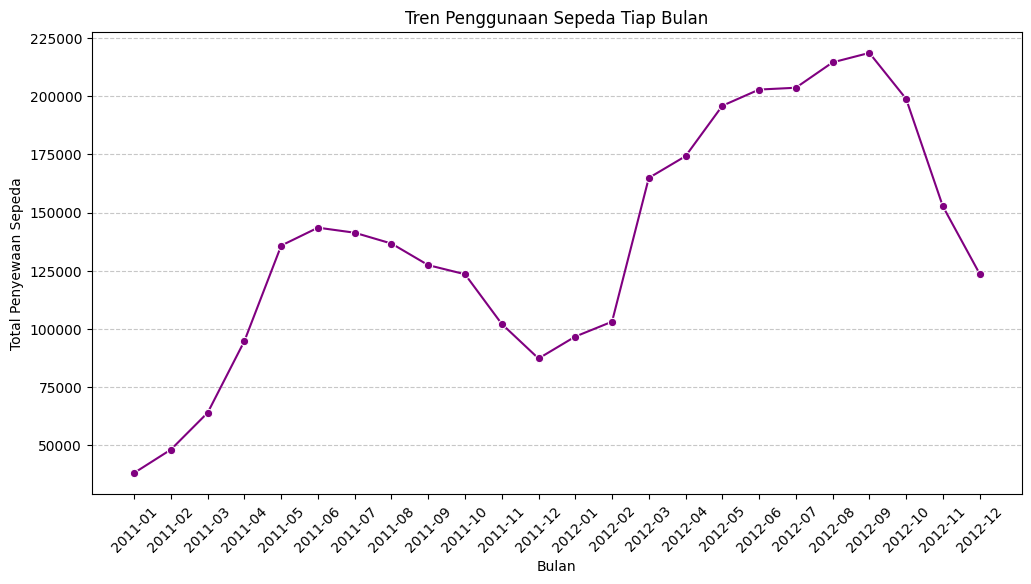

Total penyewaan sepeda tiap bulan:
       month     cnt
0   2011-01   38189
1   2011-02   48215
2   2011-03   64045
3   2011-04   94870
4   2011-05  135821
5   2011-06  143512
6   2011-07  141341
7   2011-08  136691
8   2011-09  127418
9   2011-10  123511
10  2011-11  102167
11  2011-12   87323
12  2012-01   96744
13  2012-02  103137
14  2012-03  164875
15  2012-04  174224
16  2012-05  195865
17  2012-06  202830
18  2012-07  203607
19  2012-08  214503
20  2012-09  218573
21  2012-10  198841
22  2012-11  152664
23  2012-12  123713


In [35]:
# Mengubah format kolom tanggal menjadi tipe datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Membuat kolom baru untuk menyimpan informasi bulan dalam format YYYY-MM
day_df["month"] = day_df["dteday"].dt.to_period("M").astype(str)

# Menghitung total penyewaan sepeda per bulan
monthly_trend = day_df.groupby("month")["cnt"].sum().reset_index()

# Membuat visualisasi tren penyewaan sepeda tiap bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="cnt", data=monthly_trend, marker="o", color="purple", linestyle="-")
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Tren Penggunaan Sepeda Tiap Bulan")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Menampilkan hasil perhitungan penyewaan sepeda berdasarkan bulan
print("Total penyewaan sepeda tiap bulan:\n", monthly_trend)


**Insight:**
- Pola penyewaan sepeda menunjukkan fluktuasi sepanjang tahun, dengan beberapa bulan memiliki jumlah peminjaman yang lebih tinggi.
- Adanya tren naik dan turun dalam penggunaan sepeda bisa menjadi indikasi periode populer atau kurang diminati.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

1.  Jumlah penyewaan sepeda tertinggi terjadi pada musim panas karena cuaca yang lebih kondusif untuk aktivitas di luar ruangan. Sebaliknya, pada musim dingin, jumlah penyewaan menurun drastis, kemungkinan disebabkan oleh suhu yang lebih rendah serta kondisi jalan yang kurang mendukung.

2. Penyewaan sepeda cenderung meningkat sepanjang tahun, dengan puncak tertinggi terjadi pada musim panas. Sebaliknya, terjadi penurunan signifikan selama musim dingin. Untuk mengurangi dampak ini, strategi pemasaran dapat difokuskan pada periode rendah, misalnya dengan menawarkan diskon atau promosi khusus guna menarik lebih banyak pengguna